# Optimization Series #3: Newton's Method in N-Dimensions

## Like in one dimension, this can be used for either root-finding or optimization, but for this, we will focus only on optimization.

In 1d, we derive Newton's method as follows:

1. Build quadratic taylor approximation
    $$\tilde{f}(x) := f(x+s) \approx sf'(x) + \frac{1}{2}s^2f^{''}(x) $$
2. Solve for $$\tilde{f}'(s) = 0$$
    $$f^{''}(x)s = -f'(x) \implies s = \frac{-f'(x)}{f^{''}(x)}$$ 
3. We now have fixed point formula for iteration
    $$g(x) = x + \frac{-f'(x)}{f^{''}(x)}$$

In N-d, the process is similar using basic matrix calculus:

1. Build quadratic taylor approximation (where H is the hessian)
    $$\tilde{f}(x) := f(x+s) \approx \nabla f(x)^Ts + \frac{1}{2}s^TH(x)s$$
2. Solve for $$\nabla \tilde{f}(s) = 0$$
    $$H(x)s = -\nabla f(x) \implies s = -H^{-1}(x)\nabla f(x)$$ 
3. We now have fixed point formula for iteration
    $$g(x) = x + s$$

In [28]:
def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 

This is [Himmelblau's Function](https://en.wikipedia.org/wiki/Himmelblau%27s_function), a multimodal function (see below) that can illustrate well the local convergence of Newton's method (big thanks to Morn the Gorn of Wikipedia for their plotting code).

Text(0.5, 0, 'y')

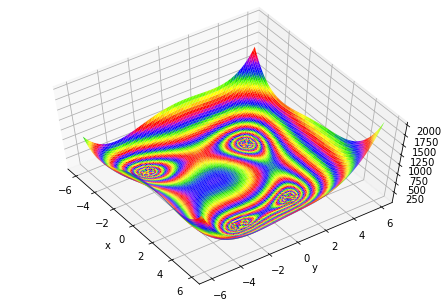

In [60]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, azim = -35, elev = 60)
X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,norm = LogNorm() , cmap = plt.cm.prism)
plt.xlabel('x')
plt.ylabel('y')

Now That we can vaguely see all 4 minima, we can extract them using newton's method with shrewd guesses. Let's start at (-4,2). 

First, to do anything, we need to form the hessian, and the gradient.
$$H = \begin{bmatrix}f_{xx} & f_{xy}\\f_{yx} & f_{yy}\end{bmatrix}$$
We need:
$$f_{xx} = 12x^2 + 4y - 42$$
$$f_{yy} = 12y^2 + 4x - 26$$
$$f_{xy} = 4(x+y)$$
$$f_{yx} = 4(x+y)$$
So
$$H = \begin{bmatrix}12x^2 + 4y - 42 & 4(x+y)\\4(x+y) & 12y^2 + 4x - 26\end{bmatrix}$$
$$\nabla f = [ 2 (-7 + x + y^2 + 2 x (-11 + x^2 + y)),2 (-11 + x^2 + y + 2 y (-7 + x + y^2))]^T$$

In [65]:
def H(x,y):
    return np.array([[12*x**2 + 4*y - 42,4*(x+y)],[4*(x+y),12*y**2 + 4*x - 26]])
def grad(x,y):
    return np.array([2* (-7 + x + y**2 + 2 *x *(-11 + x**2 + y)),2 *(-11 + x**2 + y + 2 *y *(-7 + x + y**2))]).T

In [95]:
from numpy.linalg import solve
x = -4.0
y = 2.0
ix = []
iy = []
ix.append(x)
iy.append(y)
for i in range(20):
    s1,s2 = solve(H(x,y),-1*grad(x,y))
    x += s1
    y += s2
    ix.append(x)
    iy.append(y)

In [96]:
print('x = ' + str(x))
print('y = ' + str(y))
print('f(x,y) =' + str(f(x,y)))

x = -2.805118086952745
y = 3.131312518250573
f(x,y) =7.888609052210118e-31


Text(0, 0.5, 'y')

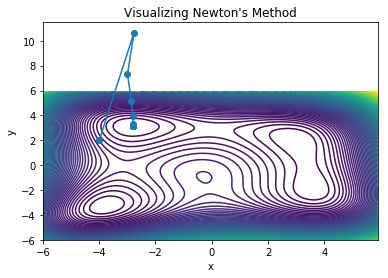

In [100]:
plt.contour(X, Y, Z, 100)
plt.plot(np.array(ix),np.array(iy),"o-")
plt.title("Visualizing Newton's Method")
plt.xlabel('x')
plt.ylabel('y')

Let's try one more with a new guess: $$\textbf{x} = [-6.0,-6.0]^T$$

In [101]:
x = -6.0
y = -6.0
ix = []
iy = []
ix.append(x)
iy.append(y)
for i in range(20):
    s1,s2 = solve(H(x,y),-1*grad(x,y))
    x += s1
    y += s2
    ix.append(x)
    iy.append(y)
print('x = ' + str(x))
print('y = ' + str(y))
print('f(x,y) =' + str(f(x,y)))

x = -3.779310253377747
y = -3.2831859912861696
f(x,y) =7.888609052210118e-31


Text(0, 0.5, 'y')

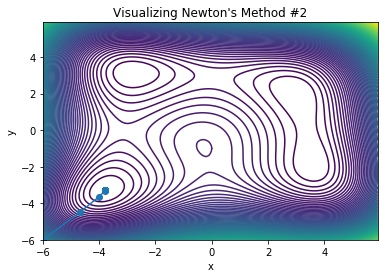

In [102]:
plt.contour(X, Y, Z, 100)
plt.plot(np.array(ix),np.array(iy),"o-")
plt.title("Visualizing Newton's Method #2")
plt.xlabel('x')
plt.ylabel('y')

$$\textbf{x} = [4.0,4.0]^T$$

In [103]:
x = 4.0
y = 4.0
ix = []
iy = []
ix.append(x)
iy.append(y)
for i in range(20):
    s1,s2 = solve(H(x,y),-1*grad(x,y))
    x += s1
    y += s2
    ix.append(x)
    iy.append(y)
print('x = ' + str(x))
print('y = ' + str(y))
print('f(x,y) =' + str(f(x,y)))

x = 3.0
y = 2.0
f(x,y) =0.0


Text(0, 0.5, 'y')

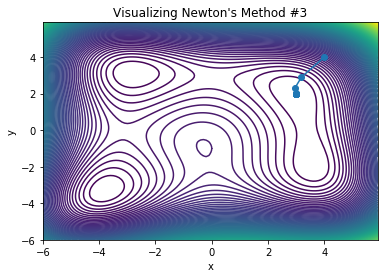

In [104]:
plt.contour(X, Y, Z, 100)
plt.plot(np.array(ix),np.array(iy),"o-")
plt.title("Visualizing Newton's Method #3")
plt.xlabel('x')
plt.ylabel('y')

$$\textbf{x} = [4.0,-4.0]^T$$

In [105]:
x = 4.0
y = -4.0
ix = []
iy = []
ix.append(x)
iy.append(y)
for i in range(20):
    s1,s2 = solve(H(x,y),-1*grad(x,y))
    x += s1
    y += s2
    ix.append(x)
    iy.append(y)
print('x = ' + str(x))
print('y = ' + str(y))
print('f(x,y) =' + str(f(x,y)))

x = 3.5844283403304917
y = -1.8481265269644036
f(x,y) =0.0


Text(0, 0.5, 'y')

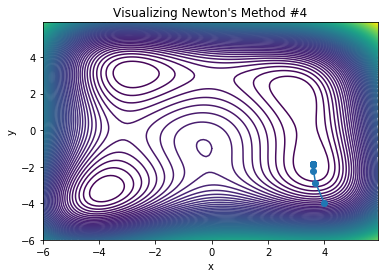

In [107]:
plt.contour(X, Y, Z, 100)
plt.plot(np.array(ix),np.array(iy),"o-")
plt.title("Visualizing Newton's Method #4")
plt.xlabel('x')
plt.ylabel('y')

We have achieved convergence to all 4 minima! These can all be verified analytically (I leave this as an exercise to the reader).

As another exercise/sidenote can you think of any ways we could automatically find all these minima?

Once again I give thanks to Morn the Gorn, as well as Andreas Klöckner for his CS 450 course materials.